In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [31]:
df=pd.read_excel('/content/drive/MyDrive/archive (4)/HealthCareData.xlsx')

In [32]:
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [33]:
df.shape

(950, 42)

In [34]:
df.isnull().any()

,0
S.NO,False
Age,False
Gender,False
Place(location where the patient lives),True
Duration of alcohol consumption(years),False
Quantity of alcohol consumption (quarters/day),False
Type of alcohol consumed,False
Hepatitis B infection,False
Hepatitis C infection,False
Diabetes Result,False


In [35]:
df.isnull().sum()

,0
S.NO,0
Age,0
Gender,0
Place(location where the patient lives),134
Duration of alcohol consumption(years),0
Quantity of alcohol consumption (quarters/day),0
Type of alcohol consumed,0
Hepatitis B infection,0
Hepatitis C infection,0
Diabetes Result,0


In [36]:
rename_mapping = {
    "Total Bilirubin    (mg/dl)": "Total Bilirubin (mg/dl)",
    "SGOT/AST      (U/L)": "SGOT/AST (U/L)",
    "SGPT/ALT (U/L)": "SGPT/ALT (U/L)",
    "Albumin   (g/dl)": "Albumin (g/dl)",
    "Hemoglobin  (g/dl)": "Hemoglobin (g/dl)",
    "Platelet Count  (lakhs/mm)": "Platelet Count (lakhs/mm)",
    "Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)": "Predicted Value (Cirrhosis)"
}

df.rename(columns=rename_mapping, inplace=True)


In [37]:
df = df[["Total Bilirubin (mg/dl)", "SGOT/AST (U/L)", "SGPT/ALT (U/L)",
         "Albumin (g/dl)", "Hemoglobin (g/dl)", "Platelet Count (lakhs/mm)","Quantity of alcohol consumption (quarters/day)",
         "Predicted Value (Cirrhosis)"]]
df=df.dropna()

In [38]:
df['Predicted Value (Cirrhosis)'] = df['Predicted Value (Cirrhosis)'].map({'YES': 0, 'no': 1})

In [39]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].apply(lambda x: str(x).replace('o', '0') if isinstance(x, str) else x)

In [40]:
# Detect rows with any string values
def has_string(row):
    return any(isinstance(x, str) for x in row)

df = df[~df.apply(has_string, axis=1)]

In [41]:
y=df['Predicted Value (Cirrhosis)']
X=df[["Total Bilirubin (mg/dl)", "SGOT/AST (U/L)", "SGPT/ALT (U/L)",
         "Albumin (g/dl)", "Hemoglobin (g/dl)", "Platelet Count (lakhs/mm)","Quantity of alcohol consumption (quarters/day)"]]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [43]:
normalizer = Normalizer()
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.transform(X_test)

In [44]:
svm_params = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

print("Best SVM Params:", svm_grid.best_params_)
print("SVM Accuracy:", svm_grid.best_score_)


Best SVM Params: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
SVM Accuracy: 1.0


In [45]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)
print("Random Forest Accuracy:", rf_grid.best_score_)


Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 1.0


In [46]:
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

print("Best KNN Params:", knn_grid.best_params_)
print("KNN Accuracy:", knn_grid.best_score_)


Best KNN Params: {'n_neighbors': 3, 'weights': 'uniform'}
KNN Accuracy: 1.0


In [47]:
lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

lr_grid = GridSearchCV(LogisticRegression(max_iter=500), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

print("Best LR Params:", lr_grid.best_params_)
print("LR Accuracy:", lr_grid.best_score_)


Best LR Params: {'C': 0.1, 'solver': 'liblinear'}
LR Accuracy: 1.0


In [48]:
NB= GaussianNB()
KNN= KNeighborsClassifier(n_neighbors=5)
SVM=SVC(kernel='linear', random_state=42)
LR=LogisticRegression(random_state=42)
RF=RandomForestClassifier(n_estimators=100, random_state=42)

NB.fit(X_train_scaled, y_train)
KNN.fit(X_train_scaled, y_train)
SVM.fit(X_train_scaled, y_train)
LR.fit(X_train_scaled, y_train)
RF.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [49]:
NB_pred = NB.predict(X_test_scaled)
KNN_pred = KNN.predict(X_test_scaled)
SVM_pred = SVM.predict(X_test_scaled)
LR_pred = LR.predict(X_test_scaled)
RF_pred = RF.predict(X_test_scaled)

In [50]:
print("Accuracy of Naive Bayes:", accuracy_score(y_test, NB_pred))
print("Accuracy of KNN:", accuracy_score(y_test, KNN_pred))
print("Accuracy of SVM:", accuracy_score(y_test, SVM_pred))
print("Accuracy of Logistic Regression:", accuracy_score(y_test, LR_pred))
print("Accuracy of Random Forest:", accuracy_score(y_test, RF_pred))

Accuracy of Naive Bayes: 1.0
Accuracy of KNN: 1.0
Accuracy of SVM: 0.9774436090225563
Accuracy of Logistic Regression: 0.9774436090225563
Accuracy of Random Forest: 1.0


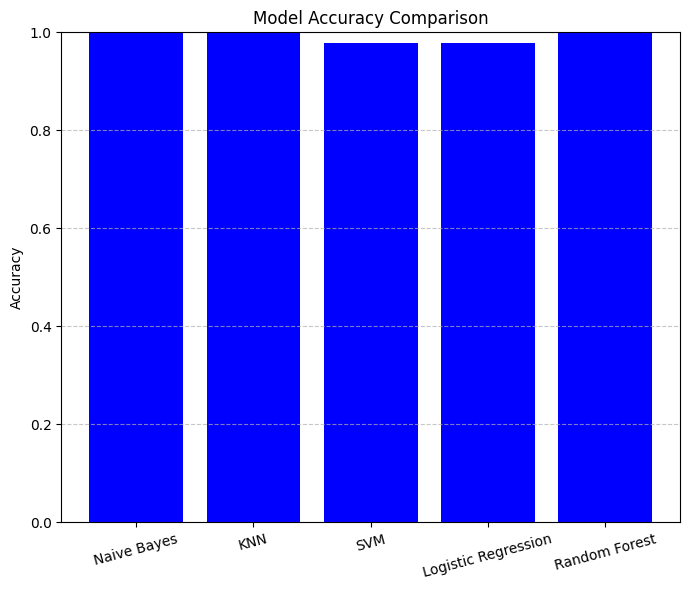

In [51]:
# Replace these with your actual predictions
accuracies = [
    accuracy_score(y_test, NB_pred),
    accuracy_score(y_test, KNN_pred),
    accuracy_score(y_test, SVM_pred),
    accuracy_score(y_test, LR_pred),
    accuracy_score(y_test, RF_pred)
]

model_names = ['Naive Bayes', 'KNN', 'SVM', 'Logistic Regression', 'Random Forest']

plt.figure(figsize=(7, 6))
plt.bar(model_names, accuracies, color='Blue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [52]:
# Evaluate
conf_matrix = confusion_matrix(y_test, RF_pred)
class_report = classification_report(y_test, RF_pred)
accuracy = accuracy_score(y_test, RF_pred)

# Display results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("Accuracy Score:", round(accuracy * 100, 2), "%")

Confusion Matrix:
 [[260   0]
 [  0   6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00         6

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Accuracy Score: 100.0 %


In [ ]:
import pickle

# Save best model
with open("rf_acc_68.pkl ", "wb") as f:
    pickle.dump(RF, f)

# Save normalizer
with open("normalizer.pkl", "wb") as f:
    pickle.dump(normalizer, f)

print("✅ Model and normalizer saved successfully using pickle.")


✅ Model and normalizer saved successfully using pickle.
